<a href="https://colab.research.google.com/github/hodangtu01/HOMEWORK1---AI/blob/main/BT3_FuzzyLogic_Homework_W5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 16.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894088 sha256=1302dabaada3e0257872a0c8212092a358623dc09217154eb37d639dffeac6e9
  Stored in directory: /root/.cache/pip/wheels/2c/04/80/7eefb1a2de7d36aefd06432fab2a1486caf0a0596a7067391a
Successfully built scikit-fuzzy


203.33333333333312


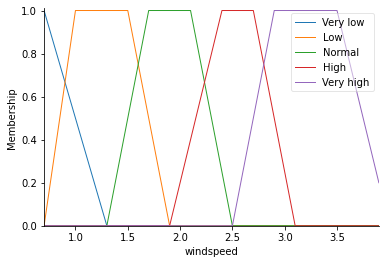

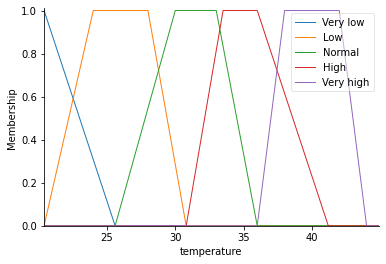

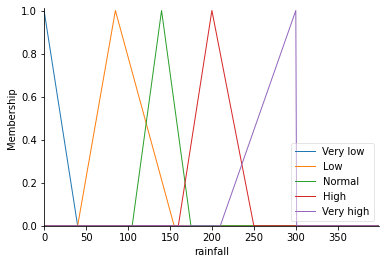

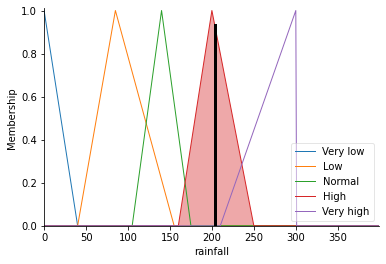

In [7]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
from skfuzzy import membership

windspeed    = ctrl.Antecedent(np.arange(0.7,4,0.1),'windspeed')
temperature  = ctrl.Antecedent(np.arange(20.4,45,0.1),'temperature')
rainfall     = ctrl.Consequent(np.arange(0,400,1),"rainfall")

# Tạo hàm liên thuộc
# WINDSPEED
windspeed["Very low"]=fuzz.trimf(windspeed.universe,[0.7,0.7,1.3])
windspeed["Low"]=fuzz.trapmf(windspeed.universe,[0.7,1,1.5,1.9])
windspeed["Normal"]=fuzz.trapmf(windspeed.universe,[1.3,1.7,2.1,2.5])
windspeed["High"]=fuzz.trapmf(windspeed.universe,[1.9,2.4,2.7,3.1])
windspeed["Very high"]=fuzz.trapmf(windspeed.universe,[2.5,2.9,3.5,4])

#TEMPERATURE
temperature["Very low"]= fuzz.trimf(temperature.universe,[20.4,20.4,25.6])
temperature["Low"]= fuzz.trapmf(temperature.universe,[20.4,24,28,30.8])
temperature["Normal"]= fuzz.trapmf(temperature.universe,[25.6,30,33,36])
temperature["High"]= fuzz.trapmf(temperature.universe,[30.8,33.5,36,41.2])
temperature["Very high"]= fuzz.trapmf(temperature.universe,[36,38,42,44])

# RAINFALL
rainfall["Very low"]=fuzz.trimf(rainfall.universe,[0,0,40])
rainfall["Low"]=fuzz.trimf(rainfall.universe,[40,85,155])
rainfall["Normal"]=fuzz.trimf(rainfall.universe,[105,140,175])
rainfall["High"]=fuzz.trimf(rainfall.universe,[160,200,250])
rainfall["Very high"]=fuzz.trimf(rainfall.universe,[210,300,300])

windspeed.view()
temperature.view()
rainfall.view()

# Tạo luật
rule1= ctrl.Rule(windspeed["Very low"]&temperature["Very low"] | windspeed["Very low"]&temperature["Low"] | windspeed["Low"]&temperature["Very low"], rainfall["Very low"])
rule2= ctrl.Rule(windspeed["Very low"]&temperature["Normal"]|windspeed["Very low"]&temperature["High"]|windspeed["Low"]&temperature["Low"]|windspeed["Low"]&temperature["Normal"]|windspeed["Normal"]&temperature["Very low"]|windspeed["Normal"]&temperature["Low"], rainfall["Low"])
rule3= ctrl.Rule(windspeed["Low"]&temperature["High"]|windspeed["Very low"]&temperature["Very high"]|windspeed["Normal"]&temperature["Normal"]|windspeed["Normal"]&temperature["High"], rainfall["Normal"])
rule4= ctrl.Rule(windspeed["High"]&temperature["Low"]|windspeed["High"]&temperature["Normal"]|windspeed["Very high"]&temperature["Very low"]|windspeed["Very high"]&temperature["Low"], rainfall["Normal"])
rule5= ctrl.Rule(windspeed["Low"]&temperature["Very high"]|windspeed["Normal"]&temperature["Very high"]|windspeed["High"]&temperature["High"]|windspeed["High"]&temperature["Very high"]|windspeed["Very high"]&temperature["Normal"],rainfall["High"])
rule6 =ctrl.Rule(windspeed["Very high"]&temperature["High"]|windspeed["Very high"]&temperature["Very high"],rainfall["Very high"])

rainfalling_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6])
rainfalling = ctrl.ControlSystemSimulation(rainfalling_ctrl)
rainfalling.input['windspeed']  = 2.5
rainfalling.input['temperature'] = 40
rainfalling.compute()
print(rainfalling.output['rainfall'])
rainfall.view(sim = rainfalling)



